# Script preparado para el IV TALLER DE MÉTODOS NUMÉRICOS Y ESTADÍSTICOS EN COSMOLOGÍA.

In [1]:
##### Notebook to read 1 file from gadget and do a plot of the density field

import matplotlib.pyplot as plt
%matplotlib inline
import pynbody


##### Path to the file
path_data = '/home/bcamacho/Desktop/eBOSS/LSSanalysis-master/nbodikit/'


##### Example to rad a file named 'mysimu_z0p500.0' which correspond in this case of:
##### "mysimu" is the name you give in the parameterfile your run for the simu
##### "_z0p500" correspond to a snapshot at z=0.5
##### ".0" is the first chunk of the simu. The simu has 1 chunk for each CPU used

#file_name = path_data +'mysimu_z0p500.0'
file_name = path_data+'2example_filename_z0p000.0'
#### Read the gadget format from the COLA output
s = pynbody.load(file_name)

#### We create the x, y and z array containning the positions for all the particles in this chunk  

x = (s['pos']).T[0]
y = (s['pos']).T[1]
z = (s['pos']).T[2]



In [2]:
import numpy as np

##### We want to know the minima and maxima in x, y and z dimensions for this chunk

print "Xmin =",  np.min(x), "Xmax=", np.max(x)
print "Ymin =",  np.min(y), "Ymax=", np.max(y)
print "Zmin =",  np.min(z), "Zmax=", np.max(z)


Xmin = 0.0 Xmax= 127.99995
Ymin = 0.0 Ymax= 511.99988
Zmin = 0.0 Zmax= 511.9998


In [3]:
##### Now we have the information we can choose a slice inside this chunk we want to show
##### Here I will choose a slice of 30 Mpc width in X and 300 by 300 Mpc in Y and Z
##### You have to adapt these cuts for your simulation.


##### Cuts to represent a slice with 30Mpc width in X
xmin = 10
xmax = 40

ymin = 100
ymax = 400

zmin = 100
zmax = 400


#### We select the particles inside the bounds we defined
tmp = np.where( (x < xmax) & (x > xmin) & (y < ymax) & (y > ymin) & (z < zmax) & (z > zmin) )

tmp = tmp[0]

x = x[tmp]
y = y[tmp]
z = z[tmp]



In [4]:
#### We have to fill a 2D array in which we will stack the particles in the X dimension.
#### So we will have a 2D array of 300Mpc by 300Mpc (Y,Z)

L_box = 300
pix_size = 0.2  ##### size of the pixels in Mpc. You can play with this parameter
N_pix = int(L_box/pix_size) +1   ##### calculate the number of pixels in each dimension

y_arr = np.linspace(0,L_box, N_pix)  #### create the array with the value of the pixel position in Y
z_arr = np.linspace(0,L_box, N_pix)  #### create the array with the value of the pixel position in Z

#### density is the 2D array we will fill
density = np.zeros( (N_pix, N_pix) )   

##### We find the cell of density array hosting each of the particles and we add 1 in it
for i in range(len(y)):
    ind_x = int(np.floor( (y[i]-ymin) /pix_size))
    ind_y = int(np.floor( (z[i]-zmin)/pix_size))
    density[ind_x, ind_y] += 1.



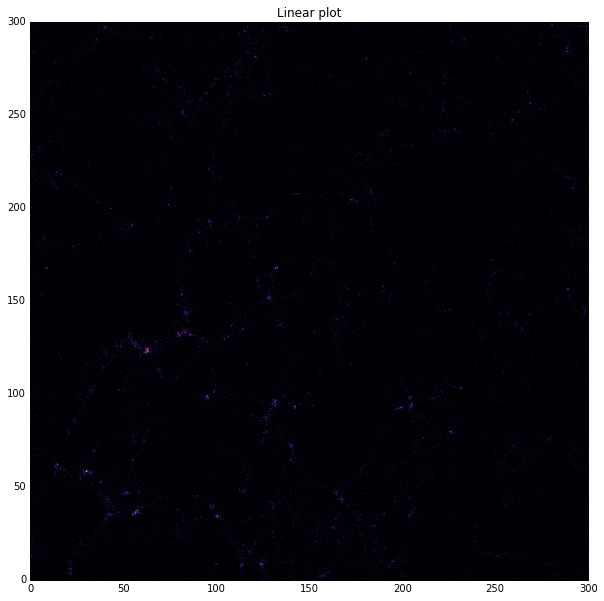

In [6]:
#### And we can plot the results. Of course we do not plot in linear scale
#### because we do not see anything
plt.figure(figsize=(10,10))
plt.pcolormesh(y_arr, z_arr, (density), cmap='magma' )
plt.title("Linear plot")
plt.show()


# Try  making a plot with a power law. You should obtain what you have seen on the slides.